In [1]:
%autosave 0

Autosave disabled


We are going to skip the hard way because we are lazy programmers!

It's there as a resource to understand how the correlation coefficient is calculated.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

Let's do an example from the mpg dataset.

In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [5]:
mpg.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

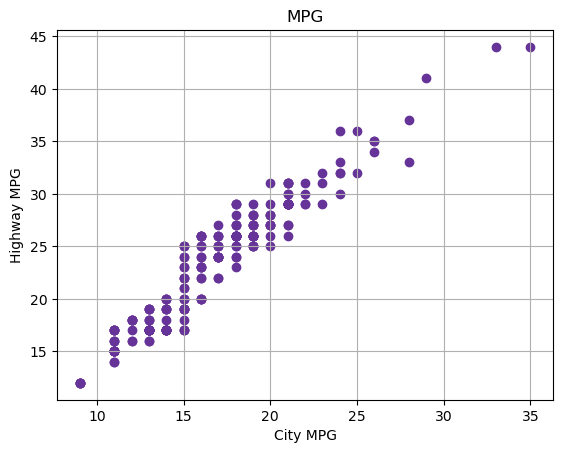

In [21]:
#always create a visual to accomodate the stats tests

plt.scatter(mpg.cty, mpg.hwy, color='RebeccaPurple')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title('MPG')
plt.grid()
plt.show()

In [23]:
r, p = stats.pearsonr(mpg.cty, mpg.hwy)
r, p

(0.9559159136495713, 1.8683071952666785e-125)

The r-value of 0.96 indicates there is a strong, positive correlation between city and highway MPG.

In [64]:
# you can assign default values to a parameters of a function
def eval_result(p_value, a = 0.05):
    
    if p_value < a:

        print('Awesome Sauce! Your result is significant!')
        
    else: 

        print('Your result was not significant!')

# saved alot of development time with this function. 

In [65]:
eval_result(p)

Awesome Sauce! Your result is significant!


# **------------------------------------------------------------------------------------------------------**

Let's look at a limitation of the Pearson's r test with a non-linear relationship.

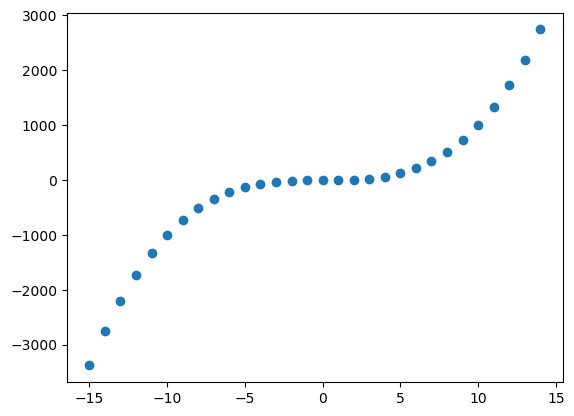

In [42]:
x = list(range(-15, 15, 1))
y = [i ** 3 for i in x]

plt.scatter(x,y)
plt.show()

In [44]:
r_cubed, p_cubed = stats.pearsonr(x,y)
eval_result(p_cubed)

Awesome Sauce! Your result is significant!


In [46]:
r_cubed #it's telling us there is a linear and strong correlation, but we can obviously tell it is not!

0.915178278514944

Let's look at another limitation with a linear relationship that doesn't do much.

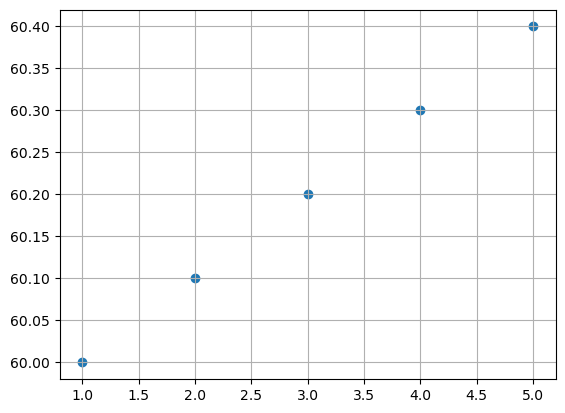

In [55]:
# This is an example of a very deceptive chart

x_not = [1, 2, 3, 4, 5]
y_not = [60, 60.1, 60.2, 60.3, 60.4]

plt.scatter(x_not, y_not)
plt.grid()
plt.show()

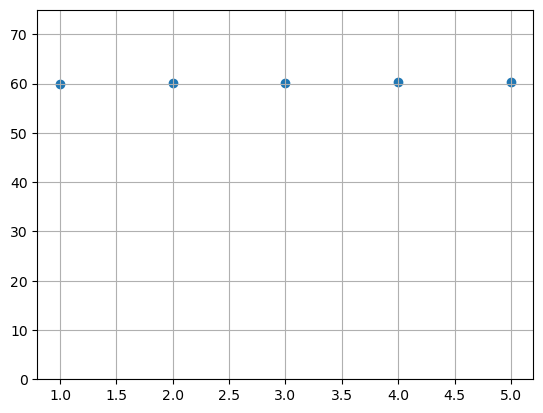

In [54]:
# added y limit to verify

x_not = [1, 2, 3, 4, 5]
y_not = [60, 60.1, 60.2, 60.3, 60.4]

plt.scatter(x_not, y_not)
plt.ylim(0, 75)
plt.grid()
plt.show()

In [58]:
r_not, p_not = stats.pearsonr(x_not, y_not)
eval_result(p_not)

Awesome Sauce! Your result is significant!


In [60]:
r_not # very tightly correlated

0.9999999999999999

Bonus! You don;t need to try this today!, it's super useful for next week on.

In [63]:
# This is a critical concept as we develop in data science

# we want functions for different stats tests


def find_correlation(f_one, f_two):

    r, p = stats.pearsonr(f_one, f_two)

    eval_result(p)

In [62]:
find_correlation(x_not, y_not)

Awesome Sauce! Your result is significant!
